# VI-ME-BA-BAR sur vos propres données!

**Instructions**:
- Vous effacerez les instructions au fur et à mesure que vous les
  aurez suivies. Commencez par effacer celle-ci!
- Mettez ici une description de votre jeu de données: où l'avez-vous
  trouvé, quel est le défi? Intuitivement quels critères pourraient
  permettre de distinguer les deux classes d'images?
- Recherchez au fur et à mesure les commandes adéquates dans le TP 2.

In [1]:
%load_ext autoreload
%autoreload 2
data_dir = "./data/"
from utilities import *

## Étape 1: prétraitement et [VI]sualisation

Le jeu de données consiste en les images suivantes:

**Instructions:**
- Ajuster la variable `dataset_dir`.
- Rajouter au fur et à mesure les utilitaires requis -- comme
  `load_images` dans `utilities.py` en les récupérant de la semaine
  dernière.

In [2]:
import os
dataset_dir = os.path.join(data_dir, 'ZeroOne')

**Instruction:** selon vos données, vous choisirez ci-dessous entre
`png` ou `jpeg`

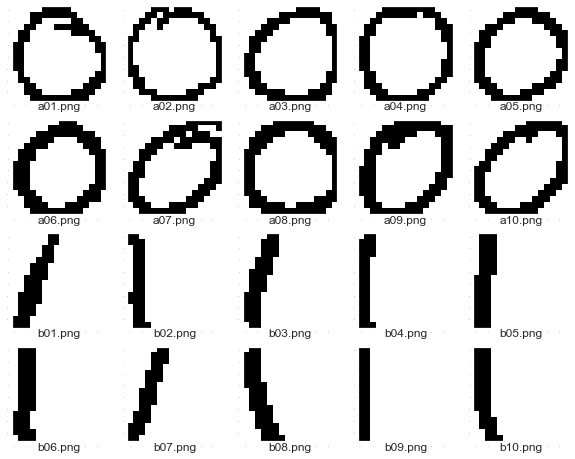

In [3]:
images = load_images(dataset_dir, "*.png")
image_grid(images, titles=images.index)

In [4]:
assert len(images) == 20

### Prétraitement

Extrayons dans un tableau de données les attributs (*features*) de nos
images ainsi que leurs classes (*vérité terrain*, *ground truth*).

**Instructions:**
- Dans un premier temps ajoutez ci-dessous deux attributs très simples;
  vous pouvez par exemple reprendre les même attributs que pour les
  pommes et bananes: rougeur et élongation. Comme d'habitude, vous les
  mettrez dans le fichier `utilities.py`.
- Lors de la deuxième semaine du projet, vous implanterez de nouveaux
  attributs que vous rajouterez ci-dessous (sans enlever les précédents!)

In [5]:
df = pd.DataFrame({
	'darkness' : images.apply(darkness),
	'elongation' : images.apply(elongation),
	'classe':      images.index.map(lambda name: 1 if name[0] == 'a' else -1),
})
df

,darkness,elongation,classe
a01.png,519.960938,1.077167,1
a02.png,558.808594,1.043389,1
a03.png,522.949219,1.104132,1
a04.png,522.949219,1.081712,1
a05.png,510.996094,1.147618,1
a06.png,463.183594,1.106545,1
a07.png,481.113281,1.375925,1
a08.png,469.160156,1.037704,1
a09.png,448.242188,1.219250,1
a10.png,499.042969,1.320711,1


In [6]:
assert len(df[df['classe'] ==  1]) == 10
assert len(df[df['classe'] == -1]) == 10

Pour calculer les corrélations entre colonnes, nous aurons besoin de
standardiser chacune d'entre elles, à l'exception de la colonne
classes!

In [7]:
dfstd =  (df - df.mean()) / df.std()
dfstd["classe"] = df["classe"]
dfstd

,darkness,elongation,classe
a01.png,-0.635889,-0.942451,1
a02.png,-0.114340,-0.955000,1
a03.png,-0.595770,-0.932434,1
a04.png,-0.595770,-0.940763,1
a05.png,-0.756247,-0.916280,1
a06.png,-1.398154,-0.931538,1
a07.png,-1.157438,-0.831469,1
a08.png,-1.317915,-0.957111,1
a09.png,-1.598749,-0.889670,1
a10.png,-0.916723,-0.851979,1


Vérifions:

In [8]:
dfstd.describe()

,darkness,elongation,classe
count,2.000000e+01,2.000000e+01,20.000000
mean,-4.440892e-17,3.885781e-17,0.000000
std,1.000000e+00,1.000000e+00,1.025978
min,-1.598749e+00,-9.571113e-01,-1.000000
25%,-7.963658e-01,-9.317623e-01,-1.000000
50%,2.467330e-01,-1.871056e-01,0.000000
75%,7.783122e-01,6.728359e-01,1.000000
max,1.370070e+00,2.082290e+00,1.000000


### Visualisation

Tout d'abord, extrayons quelques statistiques de base:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Visualisons le tableau de données sous forme de carte de chaleur
(*heat map*):

In [9]:
dfstd.style.background_gradient(cmap='RdYlGn_r')

,darkness,elongation,classe
a01.png,-0.635889,-0.942451,1
a02.png,-0.114340,-0.955000,1
a03.png,-0.595770,-0.932434,1
a04.png,-0.595770,-0.940763,1
a05.png,-0.756247,-0.916280,1
a06.png,-1.398154,-0.931538,1
a07.png,-1.157438,-0.831469,1
a08.png,-1.317915,-0.957111,1
a09.png,-1.598749,-0.889670,1
a10.png,-0.916723,-0.851979,1


la matrice de corrélation:

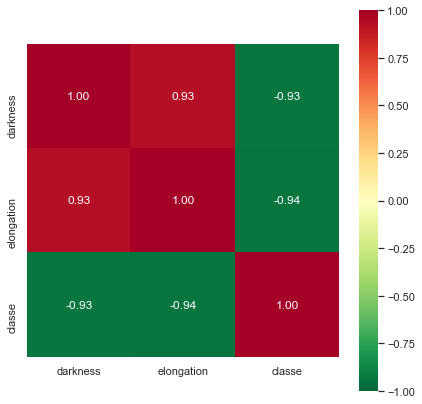

In [11]:
fig = Figure(figsize=(7,7))
sns.heatmap(dfstd.corr(), fmt='0.2f', annot=True, square=True, cmap='RdYlGn_r', vmin=-1, vmax=1, ax=fig.add_subplot())
fig

ainsi que le nuage de points (*scatter plot*):

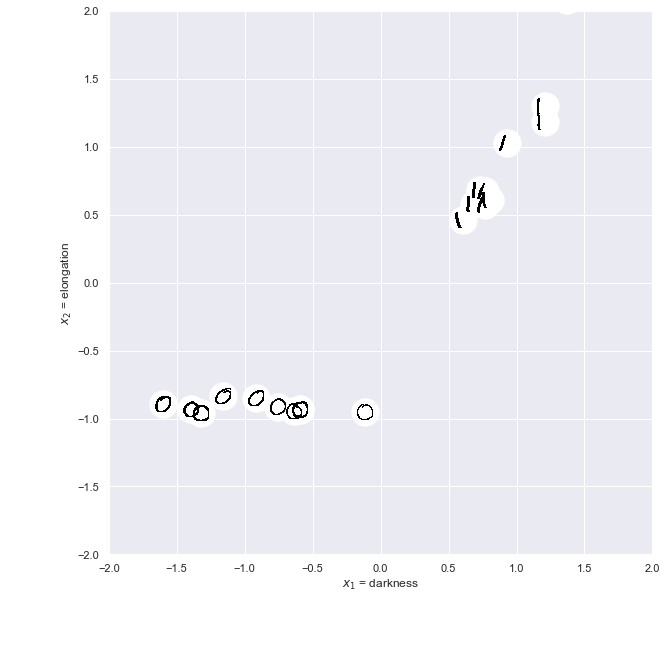

In [12]:
# YOUR CODE HERE
make_scatter_plot(dfstd, images.apply(transparent_background_filter), axis='square')

### Observations

**Instructions:** décrire ici vos observations: corrélations
apparentes ou pas, interprétation de ces corrélations à partir du
nuage de points, etc. Est-ce que les attributs choisis semblent
suffisants?  Quel attribut semble le plus discriminant? Est-ce
qu'un seul d'entre eux suffirait? Vous compléterez visualisations
et observations ultérieurement lorsque vous rajouterez de nouveaux
attributs.

## Étape 2: [ME]sure de performance (*[ME]tric*)

Pour mesurer les performances de ce problème de classification, nous
utiliserons la même métrique par taux d'erreur que dans le TP2 .

### Partition (*split*) du jeu de données en ensemble d'entraînement et ensemble de test

Séparons d'abord les attributs (dans `X`) de la vérité terrain (dans
`Y`):

In [13]:
X = dfstd[['darkness', 'elongation']]
Y = dfstd['classe']

Maintenant partitionnons nos images en ensemble d'entraînement et ensemble
de test:

In [14]:
# YOUR CODE HERE
train_index, test_index = split_data(X, Y, verbose = True, seed=0)
Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
Ytrain, Ytest = Y.iloc[train_index], Y.iloc[test_index]

TRAIN: [14 19  2 11  3 18 12  5  9  1] TEST: [ 0 17  4 13  6  8  7 16 10 15]


Les images suivantes serviront à entraîner notre modèle de prédiction
(*prédictive model*):

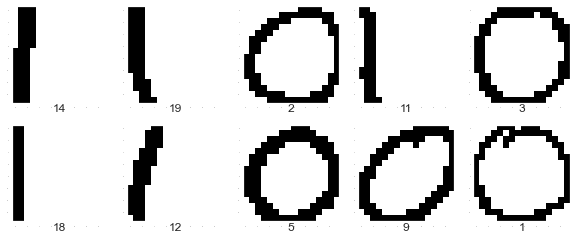

In [26]:
image_grid(images.iloc[train_index], titles=train_index)

celles-ci à le tester et à évaluer sa performance:

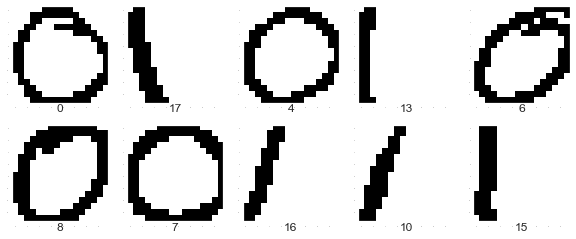

In [27]:
image_grid(images.iloc[test_index], titles=test_index)

Les voici sous forme de nuage de points en fonction de leurs attributs:

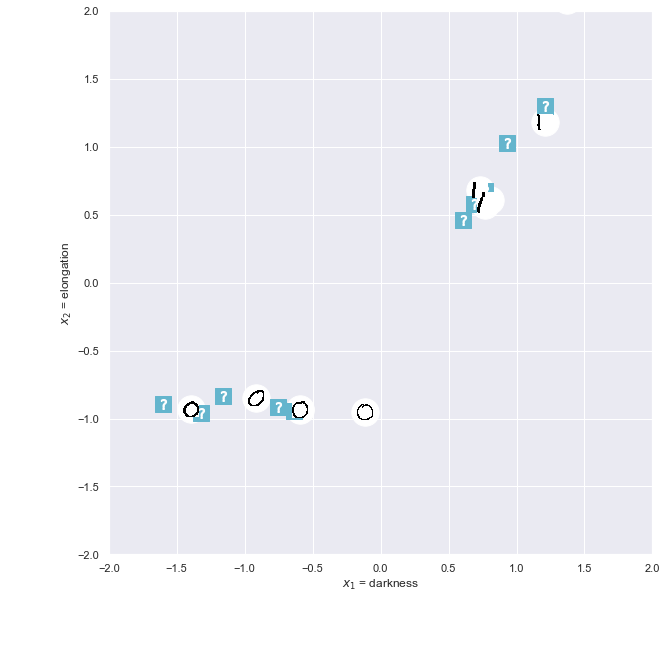

In [28]:
# YOUR CODE HERE
make_scatter_plot(dfstd, images, train_index, test_index, filter=transparent_background_filter, axis='square')

### Taux d'erreur

Comme la semaine dernière, nous utiliserons le taux d'erreur comme
métrique, d'une part sur l'ensemble d'entraînement, d'autre part sur
l'ensemble de test:

In [32]:
show_source(error_rate)

## Étape 3: Référence (*[BA]se line*)

### Classification

Pour obtenir une référence, nous choisissons le classifieur
KDTree que nous entraînons sur l'ensemble
d'entraînement:

In [38]:
from sklearn.neighbors import KNeighborsClassifier

Calculons les prédictions sur l'ensemble  d'entraînement et
l'ensemble de test, ainsi que les taux d'erreur dans les deux cas:

In [1]:
neigh = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree")
neigh.fit(Xtrain, Ytrain)
Ytrain_predicted = neigh.predict(Xtrain)
Ytest_predicted = neigh.predict(Xtest)
e_tr = error_rate(Ytrain_predicted, Ytrain)
e_te = error_rate(Ytest_predicted, Ytest)

print("Training error:", e_tr)
print("Test error:", e_te)

NameError: name 'KNeighborsClassifier' is not defined

Voici les prédictions obtenues:

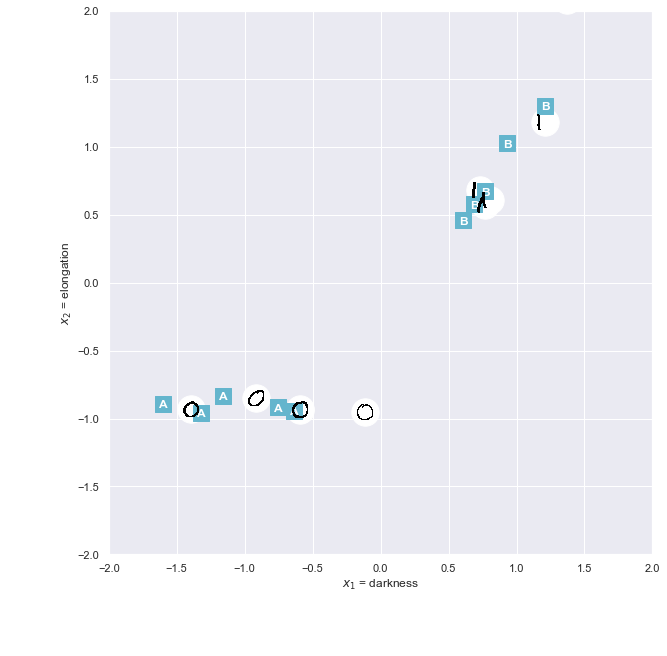

In [42]:
# The training examples are shown as white circles and the test examples are black squares.
# The predictions made are shown as letters in the black squares.
make_scatter_plot(X, images.apply(transparent_background_filter),
                  train_index, test_index, 
                  predicted_labels=Ytest_predicted, axis='square')

### Interprétation

**Instructions:** donnez ici votre interprétation des résultats. La
performance des prédictions paraît elle satisfaisante? Avez vous une
première intuition de comment l'améliorer?

Le jeu de données était très simple et ce modèle parait un petit peu overkill alors que l'on aurait simplement pu faire une méthode OneR.

## Étape 4: [BAR]res d'erreur (*error bar*)

### Barre d'erreur 1-sigma

Comme première estimation de la barre d'erreur, voici la barre d'erreur 1-sigma pour le taux d'erreur `e_te`:

In [43]:
# YOUR CODE HERE
sigma = np.sqrt((e_te * (1-e_te))/10)

print("TEST SET ERROR RATE: {0:.2f}".format(e_te))
print("TEST SET STANDARD ERROR: {0:.2f}".format(sigma))

TEST SET ERROR RATE: 0.00
TEST SET STANDARD ERROR: 0.00


### Barre d'erreur par validation croisée (Cross-Validation)

Nous calculons maintenant une autre estimation de la barre d'erreur en
répétant l'évaluation de performance pour de multiples partitions
entre ensemble d'entraînement et ensemble de test:

In [44]:
n_te = 10
SSS = StratifiedShuffleSplit(n_splits=n_te, test_size=0.5, random_state=5)
E = np.zeros([n_te, 1])
k = 0
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index], Y.iloc[test_index]
    neigh.fit(Xtrain, Ytrain.ravel()) 
    Ytrain_predicted = neigh.predict(Xtrain)
    Ytest_predicted = neigh.predict(Xtest)
    e_te = error_rate(Ytest, Ytest_predicted)
    print("TEST ERROR RATE:", e_te)
    E[k] = e_te
    k = k+1
    
e_te_ave = np.mean(E)
# It is bad practice to show too many decimal digits:
print("\n\nCV ERROR RATE: {0:.2f}".format(e_te_ave))
print("CV STANDARD DEVIATION: {0:.2f}".format(np.std(E)))

sigma = np.sqrt(e_te_ave * (1-e_te_ave) / n_te)
print("TEST SET STANDARD ERROR (for comparison): {0:.2f}".format(sigma))

TRAIN: [19 14  6  3  8 12  2  5 17 15] TEST: [ 9 13 16  4  7  1 11 18 10  0]
TEST ERROR RATE: 0.0
TRAIN: [10 16  2 11 15  3  1  6 17  0] TEST: [14 13  7 12 18  9  5  4  8 19]
TEST ERROR RATE: 0.0
TRAIN: [ 4 11  5 19 12 15  9 13  8  1] TEST: [ 3 17 14  2  7 18  6 16 10  0]
TEST ERROR RATE: 0.0
TRAIN: [10 13 15  6  5 17  0 16  9  7] TEST: [11  3  8 14 18 19  1 12  2  4]
TEST ERROR RATE: 0.0
TRAIN: [19  6  5 13 14  4  8 11  0 12] TEST: [ 7 17 15 10  3 18 16  2  1  9]
TEST ERROR RATE: 0.0
TRAIN: [ 4  6 12  8  0 10 18  7 13 19] TEST: [ 1 16  3  2 14 15  5 17 11  9]
TEST ERROR RATE: 0.0
TRAIN: [10 18 12  6  7 13  8  4 14  9] TEST: [17  0 11 19  5 15  1 16  3  2]
TEST ERROR RATE: 0.0
TRAIN: [ 3 10  7 15  2 16  8 18  6 13] TEST: [ 9  5 19 11 14 17 12  1  4  0]
TEST ERROR RATE: 0.0
TRAIN: [ 3  7  8 14  1 16 15 10 12  4] TEST: [ 9 11  2 17 13 19 18  5  6  0]
TEST ERROR RATE: 0.0
TRAIN: [18 10  4  8 17  7 12 13  2  9] TEST: [ 1  0 11 14 15  5 19  6 16  3]
TEST ERROR RATE: 0.0


CV ERROR RATE: 0.0

## Conclusion

**Instructions:** Vous résumerez ici les performances obtenues, tout
d'abord avec votre référence, puis avec les variantes que vous aurez
explorées en changeant d'attributs et de classifieur. Puis vous
commenterez sur la difficulté du problème ainsi que les pistes possibles
pour soit obtenir de meilleures performances, soit pour généraliser
le problème.